<img style="float: right;" src="../htwlogo.jpg">

# Noise and averaging

**Author**: _Erik Rodner_<br>
**Lecture**: Computer Vision and Machine Learning I

In this notebook, we will walk through different noise types that appear and images. Furthermore, we will show how to remove them if there is an opportunity to take multiple images.

In [2]:
# import our usual friends
from skimage.io import imread, imsave
import matplotlib.pylab as plt
import numpy as np
import skimage.data as examples
from skimage.color import rgb2gray

In [3]:
img = rgb2gray(examples.astronaut())

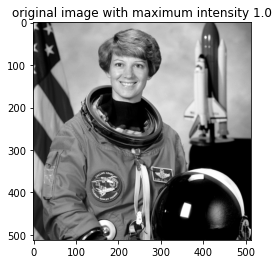

In [8]:
plt.gray()
plt.imshow(img)
plt.title(f"original image with maximum intensity {np.max(img)}")
plt.show()

### Random numbers in python and numpy

Let's first have a look how to generate random numbers with python and especially our famous module numpy

In [12]:
# generate random numbers between 0 and 1 uniformly
for i in range(10):
    print (np.random.rand())

0.7686537043828343
0.9201116079754399
0.9499935522757316
0.015805342904036568
0.08498690668899755
0.06378529122433851
0.2839717346104901
0.4027070147587335
0.5535271232610647
0.16694187549120676


All numbers are drawn independently from each other from a uniform distribution. The nice thing is that we can generate multiple of these numbers at once with numpy by just specifying the shape of the matrix:

In [15]:
np.random.rand(10,1)

array([[0.00889025],
       [0.17859142],
       [0.77317713],
       [0.07056897],
       [0.78080978],
       [0.92180355],
       [0.52088062],
       [0.27983095],
       [0.50286595],
       [0.59947221]])

We can use this to simply draw random numbers in the plane $[0,1] x [0,1]$

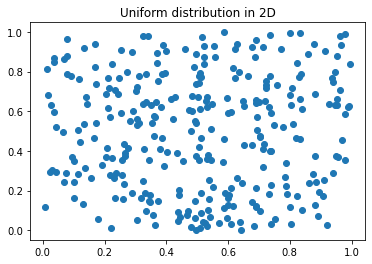

In [38]:
points = np.random.rand(300,2)
# we select full columns by using : as an index for rows
plt.scatter( points[:,0], points[:,1] ) 
plt.title("Uniform distribution in 2D")
plt.show()

Let's do the same with points drawn from a Gaussian distribution using ```randn```

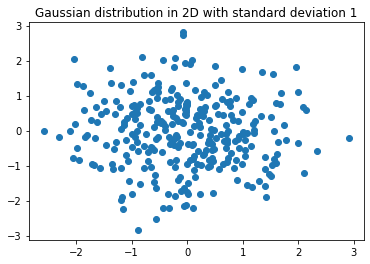

In [39]:
points = np.random.randn(300,2)
# we select full columns by using : as an index for rows
plt.scatter( points[:,0], points[:,1] ) 
plt.title("Gaussian distribution in 2D with standard deviation 1")
plt.show()

## Random noise on images

Let's go back to images and add noise to images to see the effect. In reality, noise will be already present in the images and we simply add it here for illustration.

In [40]:
h, w = img.shape

We will use the following helper function for staying in the right intensity range [0,1]

In [41]:
def clip(img, lower=0.0, upper=1.0):
    return np.minimum(np.maximum(img, lower), upper)

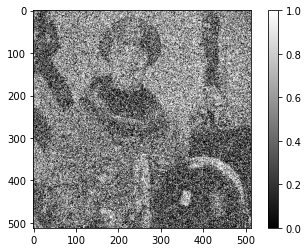

In [42]:
img_noisy = clip(img + np.random.randn(h, w))
plt.imshow(img_noisy)
plt.colorbar()

Ups, this was too bad. However, keep in mind that ```randn``` uses a Gaussian distribution with standard deviation of 1 by default. 
This leads to high values as can be seen in the distribution plot above. Let's scale this noise down and show multiple images with a different standard deviation.

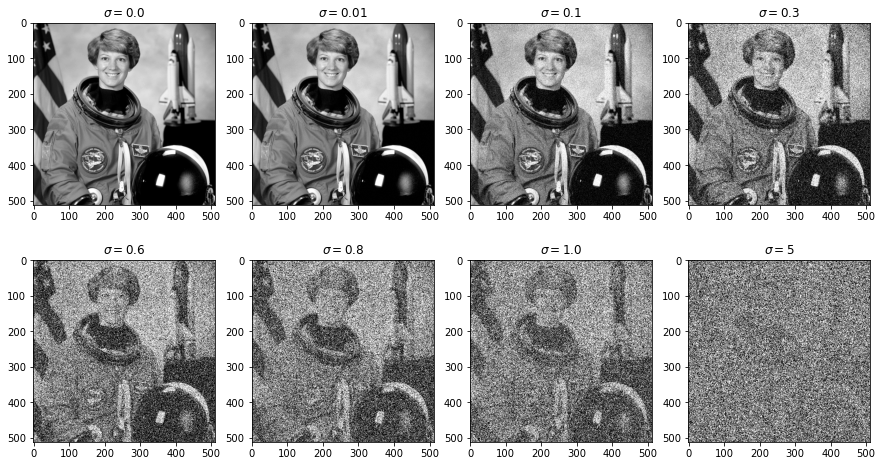

In [48]:
plt.figure(figsize=(15,8))
for index, stddev in enumerate([0.0, 0.01, 0.1, 0.3, 0.6, 0.8, 1.0, 5]):
    img_noisy = clip(img + stddev*np.random.randn(h, w))
    plt.subplot(2,4,index+1)
    plt.imshow(img_noisy, vmin=0, vmax=1)
    plt.title(f"$\sigma={stddev}$")

Another common type of noise is **salt and pepper noise**, where pixels are completely turned off. We can simulate this by generating a random boolean matrix that we multiply the image with. The boolean matrix is generated by thresholding the random matrix of continuous values. Actually, we just show pepper noise :)

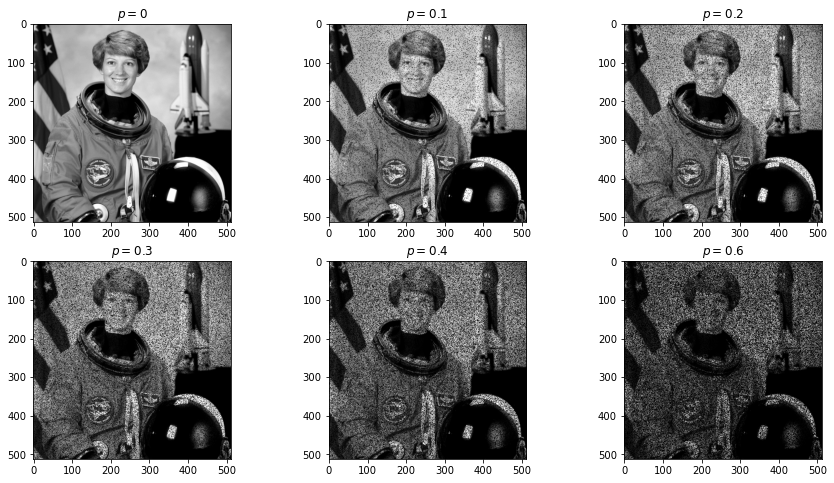

In [66]:
# with probability p the matrix e contains the value 0 and the resulting pixel
# after multiplication will be black
plt.figure(figsize=(15,8))
for index, p in enumerate([0, 0.1, 0.2, 0.3, 0.4, 0.6]):
    e = np.random.rand(h, w) > p
    img_noisy = img * e
    plt.subplot(2,3,index+1)
    plt.imshow(img_noisy)
    plt.title(f"$p={p}$")

## Reducing noise by averaging

In [70]:
# the following function simulates image acquisition with noise
def acquire_image():
    return clip(img + 0.6 * np.random.randn(*img.shape))

Let's display some of the images

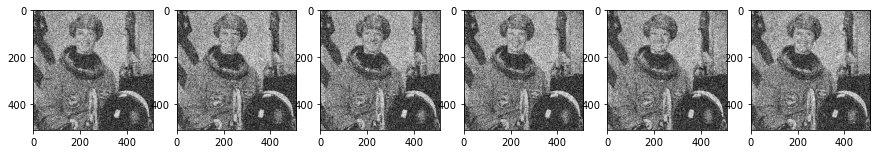

In [73]:
plt.figure(figsize=(15,8))
for index in range(6):
    plt.subplot(1,6,index+1)
    myimg = acquire_image()
    plt.imshow(myimg, vmin=0, vmax=1)

What happens if we average a few of them? Let's use some simple magic

In [81]:
images_10 = np.mean([ acquire_image() for i in range(10)], axis=0)
images_100 = np.mean([ acquire_image() for i in range(100)], axis=0)
images_1000 = np.mean([ acquire_image() for i in range(1000)], axis=0)

Text(0.5, 1.0, 'avg of 1000 images')

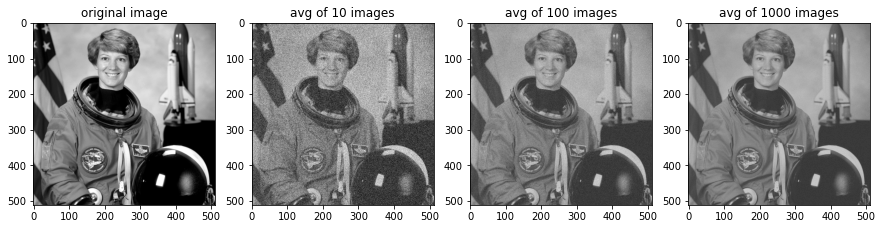

In [84]:
plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
plt.imshow(img, vmin=0, vmax=1)
plt.title("original image")
plt.subplot(1,4,2)
plt.imshow(images_10, vmin=0, vmax=1)
plt.title("avg of 10 images")
plt.subplot(1,4,3)
plt.imshow(images_100, vmin=0, vmax=1)
plt.title("avg of 100 images")
plt.subplot(1,4,4)
plt.imshow(images_1000, vmin=0, vmax=1)
plt.title("avg of 1000 images")